# Importing libraries and loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

# Loading data set

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

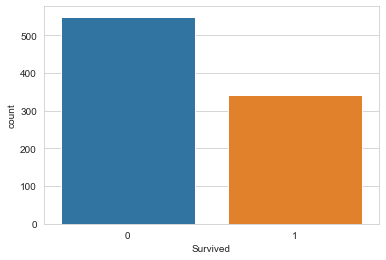

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

In [8]:
survived=sum(df['Survived']==1)
total=len(df['Survived'])
survived_percentage= survived / total
print ('Number of survived people is: ', survived)
print('\n')
print ('Survived Percentage is: ',survived_percentage)

Number of survived people is:  342


Survived Percentage is:  0.3838383838383838


# Let's look at survived - sex relation

<AxesSubplot:xlabel='Survived', ylabel='count'>

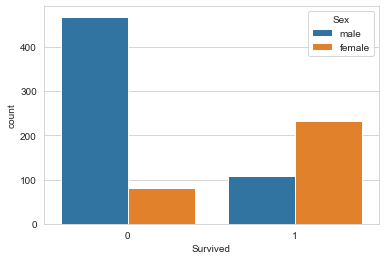

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

# Let's see survived - class relation



<AxesSubplot:xlabel='Survived', ylabel='count'>

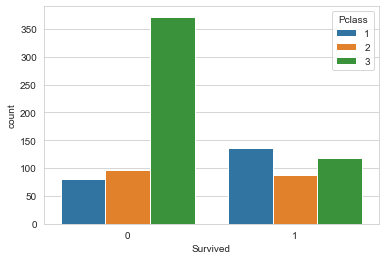

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=df)

([<matplotlib.axis.XTick at 0x1be8cd30610>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

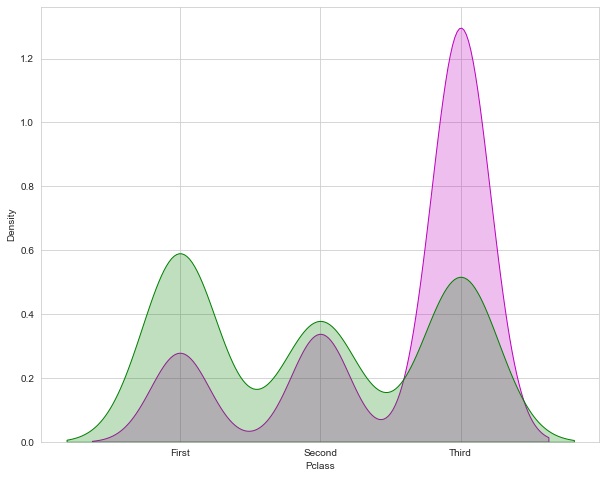

In [11]:
plt.subplots(figsize=(10,8))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='m',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

# Handling with missing values

In [12]:
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

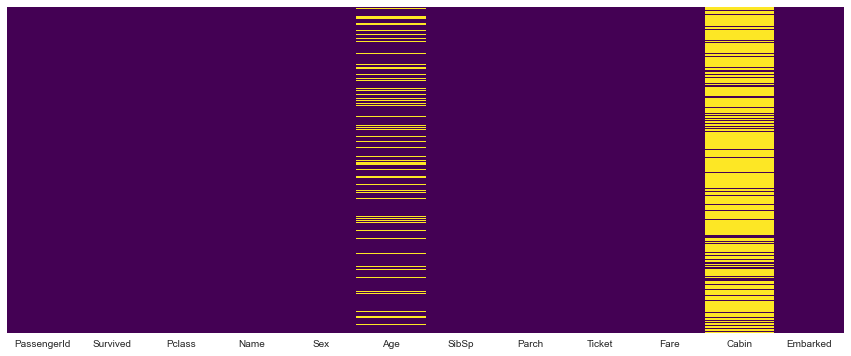

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are null values on Age, Cabin and Embarked columns. We have to take care of these values before applying kNN algorithm

We will fill missing values with mean of age per class. First we will calculate mean of age for each class and then fill the null values with these means.

In [14]:
lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [15]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)

In [16]:
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   216  38.233441
2       0.67  70.0   184  29.877630
3       0.42  74.0   491  25.140620

In [17]:
df['family_size'] = df.SibSp + df.Parch+1

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family_size', ylabel='Density'>

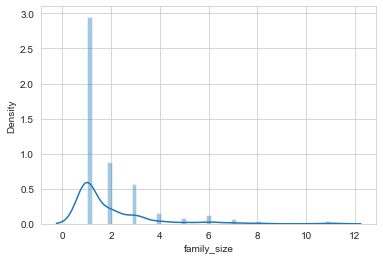

In [19]:
sns.distplot(df.family_size)

We do not use Cabin variable on this project we will drop it from data set

<AxesSubplot:>

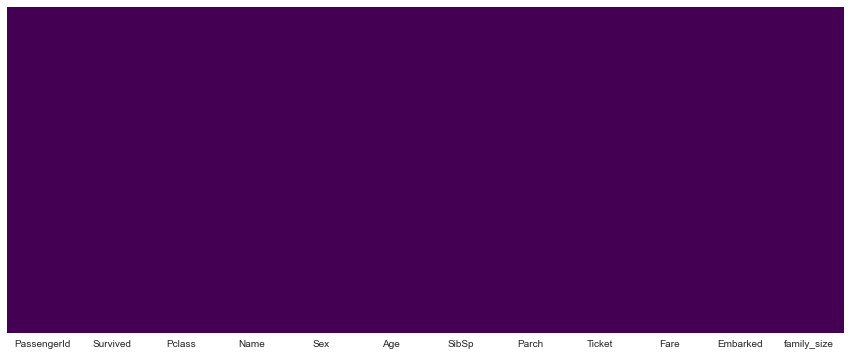

In [20]:
df.drop('Cabin', inplace=True, axis=1)
df.dropna(inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Dummy Variables

Since Sex and Embark columns are categorical features, we will use dummy variables instead of these ones.

In [21]:
sex=pd.get_dummies(df.Sex, drop_first=True)
embark=pd.get_dummies(df.Embarked, drop_first=True)
df=pd.concat([df,sex,embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,1


In [22]:
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.0,0,7.2500,2,1,0,1
1,1,1,38.0,0,71.2833,2,0,0,0
2,1,3,26.0,0,7.9250,1,0,0,1
3,1,1,35.0,0,53.1000,2,0,0,1
4,0,3,35.0,0,8.0500,1,1,0,1


In [23]:
df.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.335549,-0.055278,0.083151,0.255290,0.018277,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.400919,0.016824,-0.548193,0.064221,0.127741,0.220558,0.076466
Age,-0.055278,-0.400919,1.000000,-0.174818,0.118050,-0.253264,0.085741,-0.069494,0.005249
Parch,0.083151,0.016824,-0.174818,1.000000,0.217532,0.782988,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118050,0.217532,1.000000,0.218658,-0.179958,-0.116684,-0.163758
family_size,0.018277,0.064221,-0.253264,0.782988,0.218658,1.000000,-0.203191,-0.059007,0.078197
male,-0.541585,0.127741,0.085741,-0.247508,-0.179958,-0.203191,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.069494,-0.081585,-0.116684,-0.059007,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.005249,0.061512,-0.163758,0.078197,0.121405,-0.499261,1.000000


<AxesSubplot:>

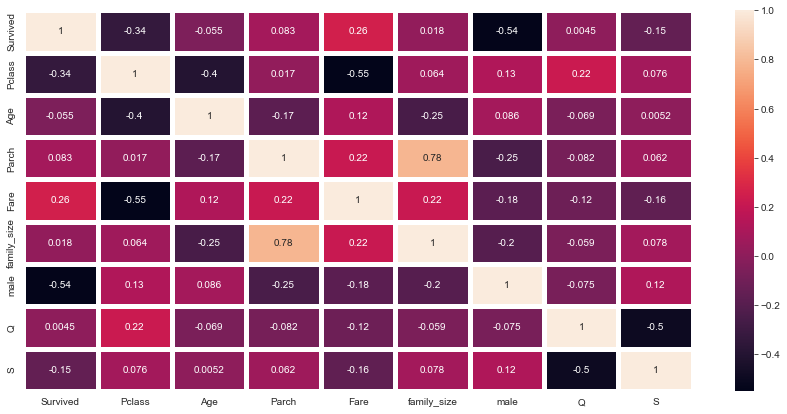

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see that there is high necative correlation between Survived and males. As we saw before by plots male's survive rate was quite low, so it makes sense that males have negative correlation with survive

Besides, Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.

Parch has high positive correlation with family_size. Because when we were creating family_size feature we have used Parch variable.

# KNN Algorithm

In [25]:
X=df.drop('Survived', axis=1)
y=df.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred=kNN.predict(X_test)

In [27]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.718
[[147  37]
 [ 46  64]]
0.6336633663366337
0.5818181818181818


# Plot the ROC curve

Text(0.5, 0, 'False Positive Rate')

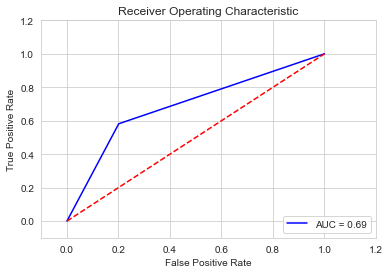

In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')